In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
import statistics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [75]:
data = pd.read_csv("dataset/cleaned_user_profiles.csv", index_col=0)

In [3]:
data.head()

,name,lang,bot,created_at,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,reply_count_entropy,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std
2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76,62.340909,14.015152,0.000000,0.272727,0.098485,0.0,0.0,0.0,0.037879,0.190903,1.609438,0.037879,0.190903
2358850842,Lourie Botton,en,0,2019-02-26 03:02:32,4,69.082645,15.041322,0.000000,0.338843,0.024793,0.0,0.0,0.0,0.049587,0.217090,1.791759,0.024793,0.155495
137959629,Dadan Syarifudin,en,1,2015-04-30 07:09:56,7,65.340909,14.694444,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
466124818,Carletto Focia,it,1,2017-01-18 02:49:18,50,86.944871,18.689463,0.022331,0.006281,0.072575,0.0,0.0,0.0,0.165387,0.530838,5.105129,0.826239,13.034008
2571493866,MBK Ebook,en,0,2019-06-18 19:30:21,8,72.311246,14.582073,0.000825,0.506461,0.118229,0.0,0.0,0.0,0.056365,0.243387,5.248623,0.016772,0.142619


In [4]:
#a descrption of the dataset
data.describe()

,bot,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,reply_count_entropy,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std
count,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000
mean,0.531456,49.622176,67.100135,15.045892,0.031045,0.329076,0.088484,0.001967,0.023941,0.058472,0.084281,0.365536,2.680103,1.357545,14.574041
std,0.499031,78.524757,12.755296,2.454106,0.053379,0.315589,0.070828,0.007796,0.068508,0.230465,0.109621,0.408358,2.353441,2.827068,23.390000
min,0.000000,0.000000,32.500000,9.644166,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,59.686796,13.553296,0.000000,0.010260,0.045455,0.000000,0.000000,0.000000,0.017751,0.136692,0.450561,0.010526,0.104251
50%,1.000000,12.000000,65.340909,14.694444,0.005109,0.300971,0.070423,0.000000,0.000000,0.000000,0.045752,0.230747,1.945910,0.043478,0.238606
75%,1.000000,55.000000,74.254999,16.772205,0.037445,0.450781,0.113295,0.000000,0.000000,0.000000,0.088862,0.451218,5.065383,0.949402,24.144412
max,1.000000,291.000000,104.449541,22.000000,0.287760,1.210354,0.337268,0.044444,0.333767,1.386294,0.529903,2.183383,8.187960,12.902439,198.461303


In [5]:
#check if there is any null value
data.isnull().values.any()

False

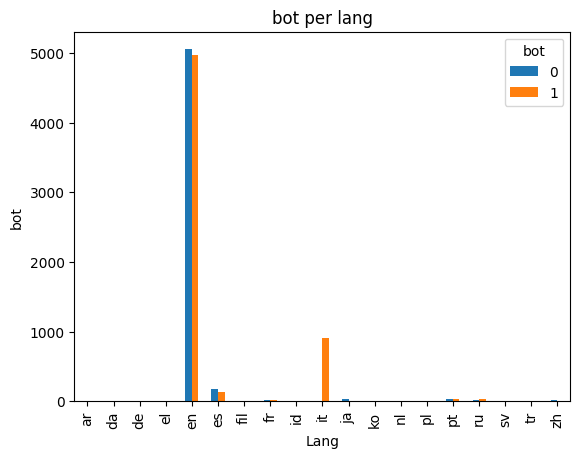

In [71]:
bot_xt_pct = pd.crosstab(data.lang, data["bot"])
bot_xt_pct.plot(kind='bar', stacked=False, 
                   title=f'bot per lang')
plt.xlabel('Lang')
plt.ylabel("bot")
plt.show()

In [6]:
def print_metrics(train_label, train_pred, test_label, test_pred):
    #evaulate the accuracy on the train set and the test set
    #metrics also contains precision, recall, f1 and the support
    print('Accuracy train set ', metrics.accuracy_score(train_label, train_pred))
    print('Accuracy test set ', metrics.accuracy_score(test_label, test_pred))
    print('Precision train set ', metrics.precision_score(train_label, train_pred, average='weighted'))
    print('Recall train set ', metrics.recall_score(train_label, train_pred, average='weighted'))
    print('F1 score train set ', metrics.f1_score(train_label, train_pred, average='weighted'))
    print('Support train set ', metrics.precision_recall_fscore_support(train_label, train_pred))

In [7]:
#metrics computed on the test set
def report_scores(test_label, test_pred):
    print(classification_report(test_label, 
                            test_pred, 
                            target_names=['<=50', '>50']))

In [8]:
#function to discretize the variables
#input: the dataset and the list of variables' names to discretize
def discretize_data(dataset, variables):
    for variable in variables:
        #get the unique variable's values
        var = sorted(dataset[variable].unique())
        
        #generate a mapping from the variable's values to the number representation  
        mapping = dict(zip(var, range(0, len(var) + 1)))

        #add a new colum with the number representation of the variable
        dataset[variable+'_num'] = dataset[variable].map(mapping).astype(int)
    return dataset

In [9]:
data = discretize_data(data, ["lang"])

In [10]:
data.head()

,name,lang,bot,created_at,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,reply_count_entropy,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std,lang_num
2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76,62.340909,14.015152,0.000000,0.272727,0.098485,0.0,0.0,0.0,0.037879,0.190903,1.609438,0.037879,0.190903,4
2358850842,Lourie Botton,en,0,2019-02-26 03:02:32,4,69.082645,15.041322,0.000000,0.338843,0.024793,0.0,0.0,0.0,0.049587,0.217090,1.791759,0.024793,0.155495,4
137959629,Dadan Syarifudin,en,1,2015-04-30 07:09:56,7,65.340909,14.694444,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,4
466124818,Carletto Focia,it,1,2017-01-18 02:49:18,50,86.944871,18.689463,0.022331,0.006281,0.072575,0.0,0.0,0.0,0.165387,0.530838,5.105129,0.826239,13.034008,9
2571493866,MBK Ebook,en,0,2019-06-18 19:30:21,8,72.311246,14.582073,0.000825,0.506461,0.118229,0.0,0.0,0.0,0.056365,0.243387,5.248623,0.016772,0.142619,4


In [11]:
# remove categorical variables
classification_features = list(data.columns)

for feat in ["lang", "bot", "created_at", "name"]:
    classification_fetures = classification_features.remove(feat)
    
print(classification_features)

['statuses_count', 'avg_length', 'avg_special_chars', 'urls_ratio', 'mentions_ratio', 'hashtags_ratio', 'reply_count_mean', 'reply_count_std', 'reply_count_entropy', 'favorite_count_mean', 'favorite_count_std', 'favorite_count_entropy', 'retweet_count_mean', 'retweet_count_std', 'lang_num']


In [12]:
data.head()

,name,lang,bot,created_at,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,reply_count_entropy,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std,lang_num
2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76,62.340909,14.015152,0.000000,0.272727,0.098485,0.0,0.0,0.0,0.037879,0.190903,1.609438,0.037879,0.190903,4
2358850842,Lourie Botton,en,0,2019-02-26 03:02:32,4,69.082645,15.041322,0.000000,0.338843,0.024793,0.0,0.0,0.0,0.049587,0.217090,1.791759,0.024793,0.155495,4
137959629,Dadan Syarifudin,en,1,2015-04-30 07:09:56,7,65.340909,14.694444,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,4
466124818,Carletto Focia,it,1,2017-01-18 02:49:18,50,86.944871,18.689463,0.022331,0.006281,0.072575,0.0,0.0,0.0,0.165387,0.530838,5.105129,0.826239,13.034008,9
2571493866,MBK Ebook,en,0,2019-06-18 19:30:21,8,72.311246,14.582073,0.000825,0.506461,0.118229,0.0,0.0,0.0,0.056365,0.243387,5.248623,0.016772,0.142619,4


In [13]:
data_classification = data[classification_features]
data_label = data.pop("bot")

In [14]:
from sklearn.model_selection import train_test_split
train_set, test_set, train_label, test_label = train_test_split(data_classification, data_label, stratify =data_label, test_size=0.30)

### Usage of Lang

In [15]:
#import, define and fit the model
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(train_set, train_label)

#predict on the test set
train_pred_gnb = gnb.predict(train_set)
test_pred_gnb = gnb.predict(test_set)

In [16]:
print_metrics(train_label, train_pred_gnb, test_label, test_pred_gnb)

Accuracy train set  0.8387337057728119
Accuracy test set  0.8273964668404287
Precision train set  0.8653480729301726
Recall train set  0.8387337057728119
F1 score train set  0.8339897764518084
Support train set  (array([0.96680498, 0.77590674]), array([0.6791203 , 0.97944406]), array([0.79782101, 0.86587506]), array([3774, 4281]))


In [17]:
#compute the performance of the model
report_scores(test_label,test_pred_gnb)

              precision    recall  f1-score   support

        <=50       0.97      0.65      0.78      1618
         >50       0.76      0.98      0.86      1835

    accuracy                           0.83      3453
   macro avg       0.86      0.82      0.82      3453
weighted avg       0.86      0.83      0.82      3453



In [18]:
# cross validation
scores = cross_validate(gnb, train_set, train_label, cv=3, return_train_score= True)
print('Fit time ', statistics.mean(scores['fit_time']))
print('Score time ', statistics.mean(scores['score_time']))
print('Test score ', statistics.mean(scores['test_score']))
print('Train score ', statistics.mean(scores['train_score']))

Fit time  0.003916263580322266
Score time  0.0021327336629231772
Test score  0.8382371198013656
Train score  0.8381750465549348


/Users/lucamoroni/Desktop/__WorkSpace/__Universita/unipi/DataMining/Data_Mining_22_23/venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


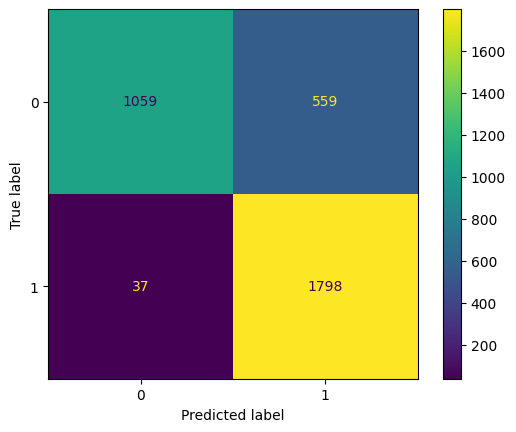

In [19]:
#it is possible to plot the confusion matrix 
#compute confusion matrix
cm = confusion_matrix(test_label, test_pred_gnb)
plot_confusion_matrix(gnb, test_set, test_label)
plt.show() 

In [20]:
pca = PCA(n_components=2)
test_set_reduced = pca.fit_transform(test_set.values)

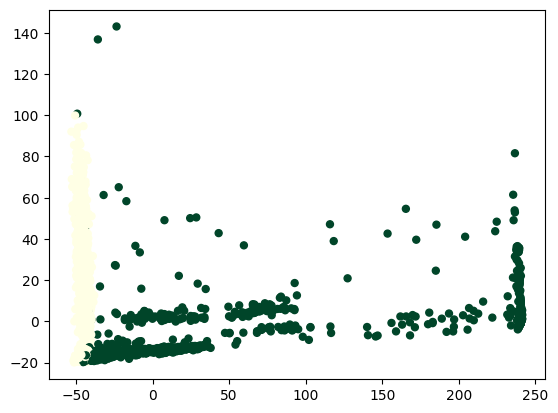

In [21]:
#true labels
from sklearn.datasets import make_blobs
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_label.values, s=25, cmap='YlGn');

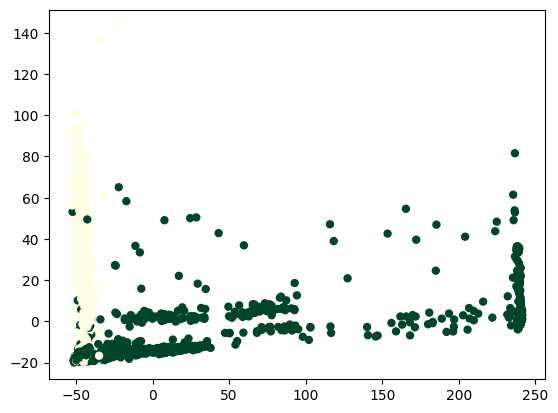

In [22]:
#predicted labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_pred_gnb, s=25, cmap='YlGn');

In [49]:
# take a non bot user
non_bot_users = data_classification[data_label==0]
total_bot = (data_label==0).sum()

In [41]:
non_bot_users.head()

,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,reply_count_entropy,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std,lang_num
2358850842,4,69.082645,15.041322,0.000000,0.338843,0.024793,0.000000,0.000000,0.0,0.049587,0.217090,1.791759,0.024793,0.155495,4
2571493866,8,72.311246,14.582073,0.000825,0.506461,0.118229,0.000000,0.000000,0.0,0.056365,0.243387,5.248623,0.016772,0.142619,4
2199062688,8,45.132176,9.732754,0.022672,0.926676,0.024120,0.000000,0.000000,0.0,0.045752,2.111569,5.773195,0.043478,54.806831,4
3118659848,4,62.362963,12.807407,0.088889,0.807407,0.111111,0.000000,0.000000,0.0,0.045752,1.813741,3.603718,7.355556,41.091851,4
616225564,7,66.850000,14.950000,0.033333,0.016667,0.233333,0.016667,0.128019,0.0,0.050000,0.284312,0.636514,0.016667,0.128019,4


In [50]:
gnb.predict(non_bot_users).sum()/total_bot

0.32826409495548964

In [53]:
for lang in data.lang_num.unique():
    # substitute lang_num with 9 (italian), all the italian are bots
    modified_non_bot_users = non_bot_users.copy()
    modified_non_bot_users["lang_num"] = lang
    modified_non_bot_users.head()
    print(f"number bot classified with lang_num = {lang} : {gnb.predict(modified_non_bot_users).sum()/total_bot}")

number bot classified with lang_num = 4 : 0.31991839762611274
number bot classified with lang_num = 9 : 0.38037833827893175
number bot classified with lang_num = 7 : 0.3581231454005935
number bot classified with lang_num = 15 : 0.5695474777448071
number bot classified with lang_num = 5 : 0.3327151335311573
number bot classified with lang_num = 17 : 0.6954747774480712
number bot classified with lang_num = 14 : 0.5168768545994066
number bot classified with lang_num = 12 : 0.443620178041543
number bot classified with lang_num = 8 : 0.3694362017804154
number bot classified with lang_num = 18 : 0.7603857566765578
number bot classified with lang_num = 10 : 0.3983679525222552
number bot classified with lang_num = 2 : 0.33846439169139464
number bot classified with lang_num = 11 : 0.41747032640949555
number bot classified with lang_num = 1 : 0.34940652818991097
number bot classified with lang_num = 0 : 0.3610905044510386
number bot classified with lang_num = 13 : 0.4792284866468843
number bot c

### Removed Lang attribute for classification

In [26]:
del train_set["lang_num"]

In [27]:
train_set.head()

,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,reply_count_entropy,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std
319071294,76,43.752809,14.694444,0.011236,0.303371,0.044944,0.0,0.0,0.0,0.022472,0.148212,0.693147,0.134831,0.863635
58394645,6,78.983516,17.541209,0.005109,0.670330,0.070423,0.0,0.0,0.0,0.159341,0.434622,3.836307,0.151099,0.414999
2409687396,10,65.971618,14.612014,0.115183,1.144392,0.310278,0.0,0.0,0.0,0.046018,0.315536,4.589528,0.043478,77.312175
164432890,7,65.750000,11.000000,0.000000,0.875000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
229875064,4,67.344828,13.885057,0.045977,0.300971,0.149425,0.0,0.0,0.0,0.057471,0.232741,1.609438,0.043478,66.404872


In [28]:
del test_set["lang_num"]

In [29]:
test_set.head()

,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,reply_count_entropy,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std
1175629302,17,62.526316,14.789474,0.052632,0.000000,0.210526,0.0,0.223297,0.0,0.052632,0.223297,0.000000,0.000000,0.000000
1174754300,12,77.071429,20.000000,0.000000,0.000000,0.071429,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
444005925,6,70.957055,16.041411,0.005109,0.069018,0.159509,0.0,0.000000,0.0,0.018405,0.174173,2.094729,2.958589,29.438453
375174626,3,65.340909,14.694444,0.117647,0.411765,0.070423,0.0,0.000000,0.0,0.045752,0.230747,1.331975,0.000000,0.000000
2358501398,7,61.992063,13.801587,0.000000,0.301587,0.071429,0.0,0.000000,0.0,0.047619,0.212959,1.791759,0.031746,0.175323


In [30]:
#import, define and fit the model
from sklearn.naive_bayes import GaussianNB

gnb2 = GaussianNB()
gnb2.fit(train_set, train_label)

#predict on the test set
train_pred_gnb = gnb2.predict(train_set)
test_pred_gnb = gnb2.predict(test_set)

In [31]:
print_metrics(train_label, train_pred_gnb, test_label, test_pred_gnb)

Accuracy train set  0.8319056486654252
Accuracy test set  0.8230524181870837
Precision train set  0.8605170752850368
Recall train set  0.8319056486654252
F1 score train set  0.8265760834956488
Support train set  (array([0.9650269 , 0.76838438]), array([0.66534181, 0.97874328]), array([0.78764115, 0.86089994]), array([3774, 4281]))


In [32]:
#compute the performance of the model
report_scores(test_label,test_pred_gnb)

              precision    recall  f1-score   support

        <=50       0.97      0.65      0.77      1618
         >50       0.76      0.98      0.85      1835

    accuracy                           0.82      3453
   macro avg       0.86      0.81      0.81      3453
weighted avg       0.86      0.82      0.82      3453



In [33]:
# cross validation
scores = cross_validate(gnb, train_set, train_label, cv=3, return_train_score= True)
print('Fit time ', statistics.mean(scores['fit_time']))
print('Score time ', statistics.mean(scores['score_time']))
print('Test score ', statistics.mean(scores['test_score']))
print('Train score ', statistics.mean(scores['train_score']))

Fit time  0.004038016001383464
Score time  0.0021223227183024087
Test score  0.8321539416511483
Train score  0.8313469894475481


/Users/lucamoroni/Desktop/__WorkSpace/__Universita/unipi/DataMining/Data_Mining_22_23/venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


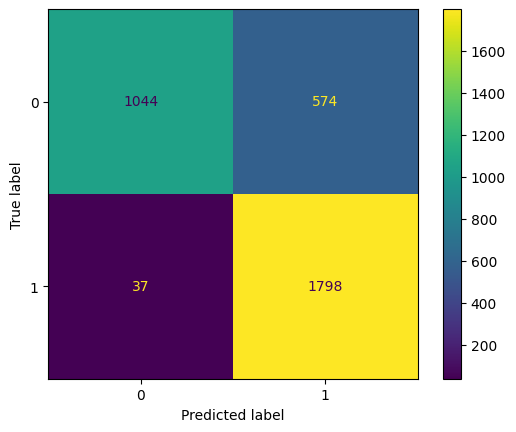

In [35]:
#it is possible to plot the confusion matrix 
#compute confusion matrix
cm = confusion_matrix(test_label, test_pred_gnb)
plot_confusion_matrix(gnb2, test_set, test_label)
plt.show() 

In [ ]:
pca = PCA(n_components=2)
test_set_reduced = pca.fit_transform(test_set.values)

In [ ]:
#true labels
from sklearn.datasets import make_blobs
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_label.values, s=25, cmap='YlGn');

In [ ]:
#predicted labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_pred_gnb, s=25, cmap='YlGn');